# Geochemistry

In this notebook we will go through dataset management using [pandas](https://pandas.pydata.org/docs/index.html) and plotting. Pandas makes handling tabular data in Python incredibly easy and, as it runs numpy in the background, the calculations are still fast. Most packages that rely on tabular data are built to work with pandas, so mastering is fundamental for performing data analysis in Python.

In [ ]:
%%capture
# Installing the pyrolite package
!pip install -q pyrolite | grep -v 'already satisfied'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.1/880.1 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 27.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [ ]:
# For data processing
import pandas as pd
import numpy as np
from pyrolite.geochem.norm import all_reference_compositions,get_reference_composition

# For visualization
import seaborn as sns
import pyrolite.plot
import matplotlib.pyplot as plt


# Pandas in Python: A Powerful Data Analysis Tool

Pandas is a popular open-source data analysis and manipulation library for Python. It provides powerful data structures like DataFrame, which allows users to work with structured data seamlessly. One of Pandas' key strengths lies in its ability to read data from multiple formats, such as CSV, Excel, SQL databases, and more. This flexibility simplifies the process of importing and handling data, regardless of its source, making it a go-to choice for data scientists and analysts.

Reading Data from Multiple Formats

Pandas simplifies the data import process. For instance, to read a CSV file into a DataFrame, you can use the pd.read_csv('filename.csv') function. Similarly, Pandas supports pd.read_excel(), pd.read_sql(), and various other functions tailored to specific data formats. This versatility streamlines the data preprocessing phase, allowing analysts to focus on extracting insights rather than dealing with data intricacies.

Filtering Capabilities

Pandas excels at data filtering, enabling users to extract specific subsets of data efficiently. Through techniques like boolean indexing and query operations, users can filter data based on conditions. For instance, df[df['column_name'] > threshold] filters rows where the 'column_name' values exceed a defined threshold. This functionality allows users to explore and analyze specific segments of their data easily.

Applications in Geology

 Geologists often deal with extensive datasets containing information about rock compositions, mineral compositions, structural data, spectral data, stratigraphy, and more. Pandas' ability to handle large datasets and its filtering capabilities are invaluable in such scenarios. Geologists can use Pandas to filter seismic data based on specific time frames, analyze mineral compositions, or explore geological features based on various parameters. Furthermore, Pandas seamlessly integrates with visualization libraries like Matplotlib and Seaborn, enabling geologists to create insightful charts and plots for better data interpretation.

In summary, Pandas in Python offers a robust and versatile framework for data analysis and manipulation. By harnessing Pandas' capabilities, geologists can enhance their data-driven decision-making processes and gain deeper insights into geological phenomena.







To start let's load a geochemistry dataset. In pandas the datasets are stored as `pandas.DataFrame` objects if 2D or as `pandas.Series`objects if 1D (vector). One advantage of pandas for handling tabular data and data analysis compared to numpy is that we can access columns by their names instead of having to memorize indexes.

In an object-oriented framework such as Python, objects can have associated **methods** and **attributes**. This was already the case for numpy, but is also key in the pandas `DataFrame`and `Series` objects.

A **method** is like a function specific for an object. Once we have an object of a certain class instantiated (which just means we declared a variable of a certain class), we can call methods for that objects. We call a method by using `object.method()`notation. Sometimes methods take arguments, just like functions.

An **attribute** is a static property of the object. So instead of being called by placing parentheses after the name, we just use `object.attribute` to visualize the attributes.

As with anything, examples will make it clearer


In [ ]:
df = pd.read_parquet("https://github.com/pierosampaio/PythonWorkshop/raw/main/Files/training_dataset2.2.parquet",engine="auto")
df = df.reset_index()


The dataframe we imported contains >48000 entries with geochemistry of rocks from different tectonic settings. We can use the `.columns`attribute of the DataFrame to see the names of all the columns.

In [ ]:
df.columns

Index(['index', 'sample_id', 'references', 'latitude', 'longitude',
       'tectonic_setting', 'rock_name', 'sio2', 'tio2', 'al2o3', 'cr2o3',
       'feot', 'nio', 'mno', 'mgo', 'cao', 'na2o', 'k2o', 'p2o5', 'loi', 'la',
       'ce', 'pr', 'nd', 'sm', 'eu', 'gd', 'tb', 'dy', 'ho', 'er', 'tm', 'yb',
       'lu', 'ba', 'li', 'th', 'ta', 'zr', 'u', 'pb', 'level1', 'level2',
       'level3'],
      dtype='object')

We can obtain slices of our DataFrame, but unlike numpy we can access items by a name. Say we want to isolate the column with SiO2 contents:

In [ ]:
df["sio2"]

0        48.10
1        48.00
2        47.80
3        47.70
4        48.30
         ...  
48610    50.22
48611    50.68
48612    48.77
48613    48.88
48614    48.66
Name: sio2, Length: 48615, dtype: float64

We can see that all names in the dataset are in lowercase. Using pandas we can rename columns easily. Let's rename the REEs from lowercase names to capitalized names. This will be important for automatic normalisation later.

For renaming we can use the `.rename()` method in our dataframe. This method takes one mandatory argument, which is a `dict` object associating the names we want to change to the new names.

This can be done with a one-liner:

`df = df.rename(dict(zip([e.lower() for e in pyrolite.geochem.REE()],pyrolite.geochem.REE())),axis=1)`

but we can also break it down into more manageable chunks. The pyrolite module we installed has the REE names handy for us with the `pyrolite.geochem.REE()`call

In [ ]:
NewNames = pyrolite.geochem.REE() # These will be the new names
NewNames

['La',
 'Ce',
 'Pr',
 'Nd',
 'Sm',
 'Eu',
 'Gd',
 'Tb',
 'Dy',
 'Ho',
 'Er',
 'Tm',
 'Yb',
 'Lu']

In [ ]:
OldNames = [e.lower() for e in pyrolite.geochem.REE()]
OldNames

['la',
 'ce',
 'pr',
 'nd',
 'sm',
 'eu',
 'gd',
 'tb',
 'dy',
 'ho',
 'er',
 'tm',
 'yb',
 'lu']

The next step is putting these two lists together in a dictionary. A quick solution to that is by using a one-two punch of `dict(zip(list1,list2))`. the `zip()` function takes the two lists as arguments and creates a tuple* of the i$^{th}$ item of each list. The subsequent `dict()` call takes each of these tuples and transforms them into a key:value pair which will essentially tell python to transform the key into the value when we are renaming.

*A tuple is like a list, but its values are immutable

In [ ]:
Renamer = dict(zip(OldNames,NewNames))
Renamer

{'la': 'La',
 'ce': 'Ce',
 'pr': 'Pr',
 'nd': 'Nd',
 'sm': 'Sm',
 'eu': 'Eu',
 'gd': 'Gd',
 'tb': 'Tb',
 'dy': 'Dy',
 'ho': 'Ho',
 'er': 'Er',
 'tm': 'Tm',
 'yb': 'Yb',
 'lu': 'Lu'}

Finally, we can use the `.rename()` method

In [ ]:
df = df.rename(Renamer,axis=1)
# axis=1 just means we are changing the names of columns
# If we wanted to change the names of rows it would be axis=0
df.columns

Index(['index', 'sample_id', 'references', 'latitude', 'longitude',
       'tectonic_setting', 'rock_name', 'sio2', 'tio2', 'al2o3', 'cr2o3',
       'feot', 'nio', 'mno', 'mgo', 'cao', 'na2o', 'k2o', 'p2o5', 'loi', 'La',
       'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb',
       'Lu', 'ba', 'li', 'th', 'ta', 'zr', 'u', 'pb', 'level1', 'level2',
       'level3'],
      dtype='object')

And now we can use pyrolite to normalize our REE values

In [ ]:
# Get the C1 chondrite composition of McDonough and Sun (1995) for normalizing REE compositions
Cn = get_reference_composition("Chondrite_SM89").set_units("ppm")

REE = df.pyrochem.REE.pyrochem.normalize_to(Cn) # Selecting only REEs and normalizing values to Chondrite
REE["Setting"] = df["level3"] # Copying the columns with geotectonic setting data
REE.replace(0,np.nan,inplace=True) # Replace 0 for nan
REE = REE.loc[REE.La.notnull()] # Exclude all nan values

## Calculating new variables:
With pandas we can not only visualize tabular data, but also filter, evaluate expressions, calculate new variables, etc.

calculating a new variable:


In [ ]:
REE["La/Sm"] = REE.eval("La/Sm")
# using the .eval() method to calculate a new ratio
# REE["La/Sm"] = REE["La"].values/REE["Sm"].values would also work


REE["Nd/10"] = REE["Nd"].apply(lambda x: x/10)
# using the .apply method and an anonymous function to calculate a new variable
# REE["Nd/10"] = REE.eval("Nd/10") also works
# REE["Nd/10"] = REE["Nd"].values/10 also works


REE["Gd/Yb"] = REE.eval("Gd/Yb")

## Filtering:
We can also use pandas to filter datasets quickly.
Remember the logic operators:
- equal to ==
- different to !=
- not ~
- smaller than <
- greater than >
- and &
- or |

In [ ]:
REE.query("La>10") # Method 1 with the .query method and str expressions

,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Setting,La/Sm,Nd/10,Gd/Yb
136,212.700422,163.621533,127.909483,99.562363,56.418919,45.648313,34.020101,26.038781,20.203252,16.666667,13.5625,11.740891,10.372671,10.162602,bab,3.770019,9.956236,3.279782
137,192.405063,137.194127,103.125000,79.431072,48.175676,40.319716,32.160804,26.315789,21.300813,17.582418,15.4375,13.765182,12.236025,11.788618,bab,3.993822,7.943107,2.628370
138,209.451477,159.216966,123.599138,96.717724,55.540541,44.227353,33.015075,25.207756,20.040650,16.117216,13.3125,11.740891,10.310559,10.162602,bab,3.771146,9.671772,3.202065
139,169.029536,126.753670,98.275862,76.367615,48.040541,40.319716,31.155779,25.484765,20.528455,17.032967,14.6250,12.550607,11.552795,12.195122,bab,3.518477,7.636761,2.696817
140,169.324895,125.611746,97.306034,75.492341,47.770270,38.898757,31.306533,25.207756,20.528455,17.032967,14.2500,12.550607,11.366460,11.788618,bab,3.544566,7.549234,2.754291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48568,15.864979,17.128874,18.103448,19.343545,19.324324,19.893428,18.693467,18.337950,17.073171,15.952381,15.5625,13.846154,13.478261,12.845528,op,0.820985,1.934354,1.386935
48569,17.088608,18.597064,19.288793,20.743982,20.810811,20.959147,20.201005,19.002770,17.804878,16.538462,16.0000,14.048583,13.726708,13.048780,op,0.821141,2.074398,1.471657
48570,15.780591,17.455139,18.750000,20.087527,20.000000,19.715808,18.944724,18.005540,16.016260,14.413919,13.6250,11.902834,11.180124,10.691057,op,0.789030,2.008753,1.694500
48571,14.050633,15.415987,16.379310,17.439825,17.702703,18.117229,16.482412,16.177285,15.121951,13.974359,13.7500,12.672065,12.732919,12.195122,op,0.793700,1.743982,1.294472


In [ ]:
REE.loc[REE["La"]>10] # Method 2 with .loc method

,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Setting,La/Sm,Nd/10,Gd/Yb
136,212.700422,163.621533,127.909483,99.562363,56.418919,45.648313,34.020101,26.038781,20.203252,16.666667,13.5625,11.740891,10.372671,10.162602,bab,3.770019,9.956236,3.279782
137,192.405063,137.194127,103.125000,79.431072,48.175676,40.319716,32.160804,26.315789,21.300813,17.582418,15.4375,13.765182,12.236025,11.788618,bab,3.993822,7.943107,2.628370
138,209.451477,159.216966,123.599138,96.717724,55.540541,44.227353,33.015075,25.207756,20.040650,16.117216,13.3125,11.740891,10.310559,10.162602,bab,3.771146,9.671772,3.202065
139,169.029536,126.753670,98.275862,76.367615,48.040541,40.319716,31.155779,25.484765,20.528455,17.032967,14.6250,12.550607,11.552795,12.195122,bab,3.518477,7.636761,2.696817
140,169.324895,125.611746,97.306034,75.492341,47.770270,38.898757,31.306533,25.207756,20.528455,17.032967,14.2500,12.550607,11.366460,11.788618,bab,3.544566,7.549234,2.754291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48568,15.864979,17.128874,18.103448,19.343545,19.324324,19.893428,18.693467,18.337950,17.073171,15.952381,15.5625,13.846154,13.478261,12.845528,op,0.820985,1.934354,1.386935
48569,17.088608,18.597064,19.288793,20.743982,20.810811,20.959147,20.201005,19.002770,17.804878,16.538462,16.0000,14.048583,13.726708,13.048780,op,0.821141,2.074398,1.471657
48570,15.780591,17.455139,18.750000,20.087527,20.000000,19.715808,18.944724,18.005540,16.016260,14.413919,13.6250,11.902834,11.180124,10.691057,op,0.789030,2.008753,1.694500
48571,14.050633,15.415987,16.379310,17.439825,17.702703,18.117229,16.482412,16.177285,15.121951,13.974359,13.7500,12.672065,12.732919,12.195122,op,0.793700,1.743982,1.294472


In [ ]:
REE.loc[(REE["La"]>10)&(REE["Yb"]<3)] # We can also combine filters with & (and) and | (or) operators

,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Setting,La/Sm,Nd/10,Gd/Yb
2566,56.962025,43.230016,NaN,27.352298,15.540541,10.834813,8.542714,NaN,4.065041,NaN,2.812500,NaN,2.484472,NaN,ca,3.665382,2.735230,3.438442
2567,56.962025,43.230016,NaN,26.258206,13.513514,10.657194,8.542714,NaN,3.658537,NaN,2.500000,NaN,2.360248,NaN,ca,4.215190,2.625821,3.619413
2568,59.071730,45.676998,NaN,28.446389,15.540541,11.012433,9.296482,NaN,3.861789,NaN,2.500000,NaN,2.298137,NaN,ca,3.801137,2.844639,4.045226
2645,3085.246132,21.083197,259.784483,6.355215,86.743243,49.330965,3.926298,62.613112,1.239837,36.984127,2.522917,44.696356,1.004141,45.813008,ca,35.567567,0.635522,3.910107
2646,3012.506329,20.194671,244.928161,6.210795,84.497748,45.985790,3.675042,61.348107,1.314363,38.638584,2.445833,44.804319,1.016563,45.311653,ca,35.651913,0.621080,3.615163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46625,12.827004,9.559543,9.159483,8.293217,7.162162,6.749556,5.879397,5.263158,4.512195,3.846154,3.375000,2.834008,2.919255,2.845528,oi,1.790940,0.829322,2.014006
46628,12.320675,9.902121,7.543103,5.995624,4.121622,3.730018,3.065327,2.493075,1.991870,1.648352,1.437500,1.214575,1.304348,1.219512,oi,2.989279,0.599562,2.350084
46631,20.210970,13.491028,10.129310,8.315098,5.540541,4.795737,4.020101,2.770083,2.073171,1.648352,1.375000,1.214575,0.993789,0.813008,oi,3.647834,0.831510,4.045226
46632,16.286920,11.712887,8.728448,6.695842,4.391892,4.262877,3.718593,3.047091,2.967480,2.564103,2.562500,2.429150,2.546584,2.439024,oi,3.708406,0.669584,1.460228


In [ ]:
REE.loc[REE["Setting"] == "bab"] # Select only back-arc basalts

,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Setting,La/Sm,Nd/10,Gd/Yb
136,212.700422,163.621533,127.909483,99.562363,56.418919,45.648313,34.020101,26.038781,20.203252,16.666667,13.56250,11.740891,10.372671,10.162602,bab,3.770019,9.956236,3.279782
137,192.405063,137.194127,103.125000,79.431072,48.175676,40.319716,32.160804,26.315789,21.300813,17.582418,15.43750,13.765182,12.236025,11.788618,bab,3.993822,7.943107,2.628370
138,209.451477,159.216966,123.599138,96.717724,55.540541,44.227353,33.015075,25.207756,20.040650,16.117216,13.31250,11.740891,10.310559,10.162602,bab,3.771146,9.671772,3.202065
139,169.029536,126.753670,98.275862,76.367615,48.040541,40.319716,31.155779,25.484765,20.528455,17.032967,14.62500,12.550607,11.552795,12.195122,bab,3.518477,7.636761,2.696817
140,169.324895,125.611746,97.306034,75.492341,47.770270,38.898757,31.306533,25.207756,20.528455,17.032967,14.25000,12.550607,11.366460,11.788618,bab,3.544566,7.549234,2.754291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2501,27.088608,25.008157,26.293103,25.492341,22.432432,21.136767,19.899497,18.559557,17.926829,17.032967,16.43750,17.004049,16.024845,16.260163,bab,1.207564,2.549234,1.241790
2503,24.936709,23.507341,24.892241,24.442013,21.959459,20.781528,19.648241,18.282548,17.804878,16.849817,16.37500,17.004049,15.962733,16.260163,bab,1.135579,2.444201,1.230882
2504,21.265823,20.783034,22.413793,22.494530,20.878378,20.248668,18.844221,18.005540,17.439024,16.849817,16.31250,16.194332,15.714286,15.853659,bab,1.018557,2.249453,1.199178
2505,22.784810,22.006525,23.491379,23.413567,21.418919,20.426288,19.447236,18.282548,17.723577,16.849817,16.31250,17.004049,15.900621,16.260163,bab,1.063770,2.341357,1.223049


In [ ]:
REE.loc[REE["Setting"].isin(["bab","ca","ioa","ia"])] # Select all arc-related rocks

,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Setting,La/Sm,Nd/10,Gd/Yb
136,212.700422,163.621533,127.909483,99.562363,56.418919,45.648313,34.020101,26.038781,20.203252,16.666667,13.56250,11.740891,10.372671,10.162602,bab,3.770019,9.956236,3.279782
137,192.405063,137.194127,103.125000,79.431072,48.175676,40.319716,32.160804,26.315789,21.300813,17.582418,15.43750,13.765182,12.236025,11.788618,bab,3.993822,7.943107,2.628370
138,209.451477,159.216966,123.599138,96.717724,55.540541,44.227353,33.015075,25.207756,20.040650,16.117216,13.31250,11.740891,10.310559,10.162602,bab,3.771146,9.671772,3.202065
139,169.029536,126.753670,98.275862,76.367615,48.040541,40.319716,31.155779,25.484765,20.528455,17.032967,14.62500,12.550607,11.552795,12.195122,bab,3.518477,7.636761,2.696817
140,169.324895,125.611746,97.306034,75.492341,47.770270,38.898757,31.306533,25.207756,20.528455,17.032967,14.25000,12.550607,11.366460,11.788618,bab,3.544566,7.549234,2.754291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27975,0.126582,0.065253,0.086207,0.113786,0.202703,0.230906,0.286432,0.332410,0.365854,0.384615,0.41250,0.445344,0.484472,0.528455,ioa,0.624473,0.011379,0.591225
27976,0.021097,0.016313,NaN,NaN,0.027027,0.035524,0.085427,0.138504,0.203252,0.274725,0.33125,NaN,0.465839,0.528455,ioa,0.780591,NaN,0.183384
27977,0.054852,0.006525,0.021552,0.035011,0.128378,0.177620,0.301508,0.443213,0.532520,0.604396,0.68125,0.809717,0.838509,0.934959,ioa,0.427271,0.003501,0.359576
27979,0.232068,0.004894,NaN,NaN,NaN,NaN,NaN,NaN,0.012195,0.018315,0.03125,0.040486,0.068323,0.081301,ioa,NaN,NaN,NaN


# Visualizing data
There are a lot of options for visualizing data in Python. The most usual one, especially for scientific purposes, is probably [matplotlib](https://matplotlib.org/stable/). This library allows for making beautiful and highly customizable plots.

[Seaborn](https://seaborn.pydata.org/) is a library built on top of matplotlib that allows for quick creation of statistical plots and coloring by catgories and values in a simpler way

### Args and kwargs
Functions in python take arguments but they can also take a keyword argument (kwarg). Keyword arguments are not necessary to run the function, but they can change the way the function behaves. That can be the color of the scatterpoints in a plotting function or the method of calculation in a calculating function, for example. The kwargs have default values set when the function is defined, that's why we don't necessarily need to set new values.

Example:

`Func(arg1, arg2, kwarg1 = val1, kwarg2 = color)`


## Scatterplots

Text(0.5, 1.0, 'A Simple Scatterplot')

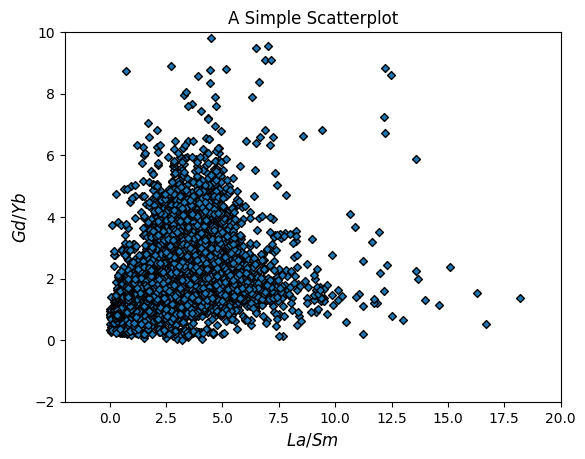

In [ ]:
# With matplotlib:

fig, ax = plt.subplots() # create a figure and ax (where the plotting happens)

ax.scatter(
    REE["La/Sm"], # x and y vectors are arguments
    REE["Gd/Yb"],
    ec="black" # edgecolor of the markers is a kwarg
)

ax.set(xlim=(-2,20),ylim=(-2,10)) # changing the limits of the plot
ax.set_xlabel("$La/Sm$")
ax.set_ylabel("$Gd/Yb$")
ax.set_title("A Simple Scatterplot")

Text(0.5, 1.0, 'A Simple Scatterplot')

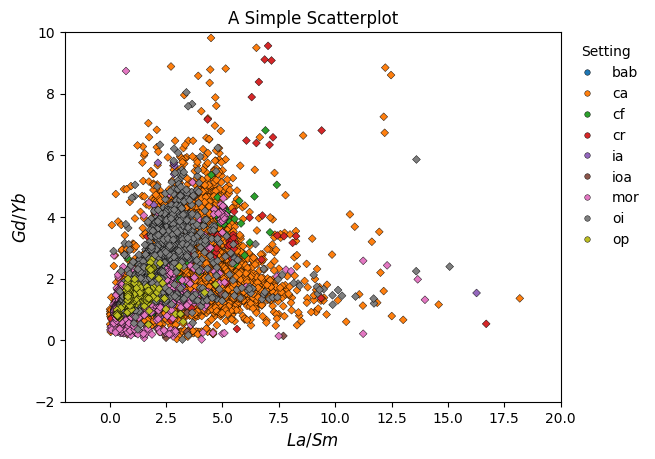

In [ ]:
# Using seaborn
# As seaborn is based on matplotlib, we can start by creating a figure in the same way
fig, ax = plt.subplots()

sns.scatterplot(
    data=REE,
    x="La/Sm",
    y="Gd/Yb",
    hue="Setting", # colour by different tectonic setting
    ec="black",
    ax=ax #specify the ax, it's more important if there is more than one
    )


ax.set(xlim=(-2,20),ylim=(-2,10)) # changing the limits of the plot
ax.set_xlabel("$La/Sm$")
ax.set_ylabel("$Gd/Yb$")
ax.set_title("A Simple Scatterplot")

Using matplotlib to plot the different settings with different colors would require a loop:

Text(0.5, 1.0, 'A Simple Scatterplot')

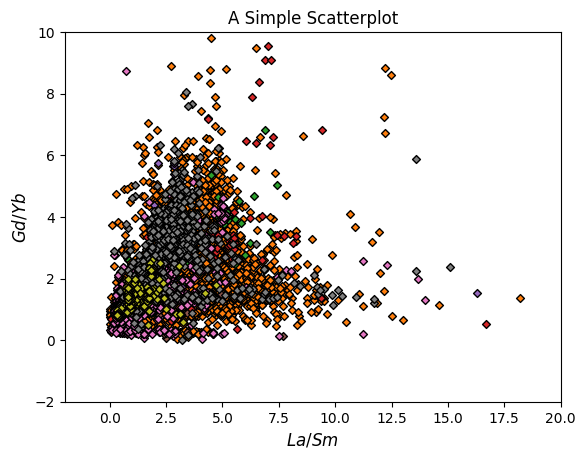

In [ ]:
fig, ax = plt.subplots()


for s in REE.Setting.unique(): # loop over the different settings
  ax.scatter(
      x=REE.loc[REE.Setting==s,"La/Sm"],
      y=REE.loc[REE.Setting==s,"Gd/Yb"],
      ec="black"
  )

ax.set(xlim=(-2,20),ylim=(-2,10)) # changing the limits of the plot
ax.set_xlabel("$La/Sm$")
ax.set_ylabel("$Gd/Yb$")
ax.set_title("A Simple Scatterplot")

## Histograms and boxplots

(0.0, 20.0)

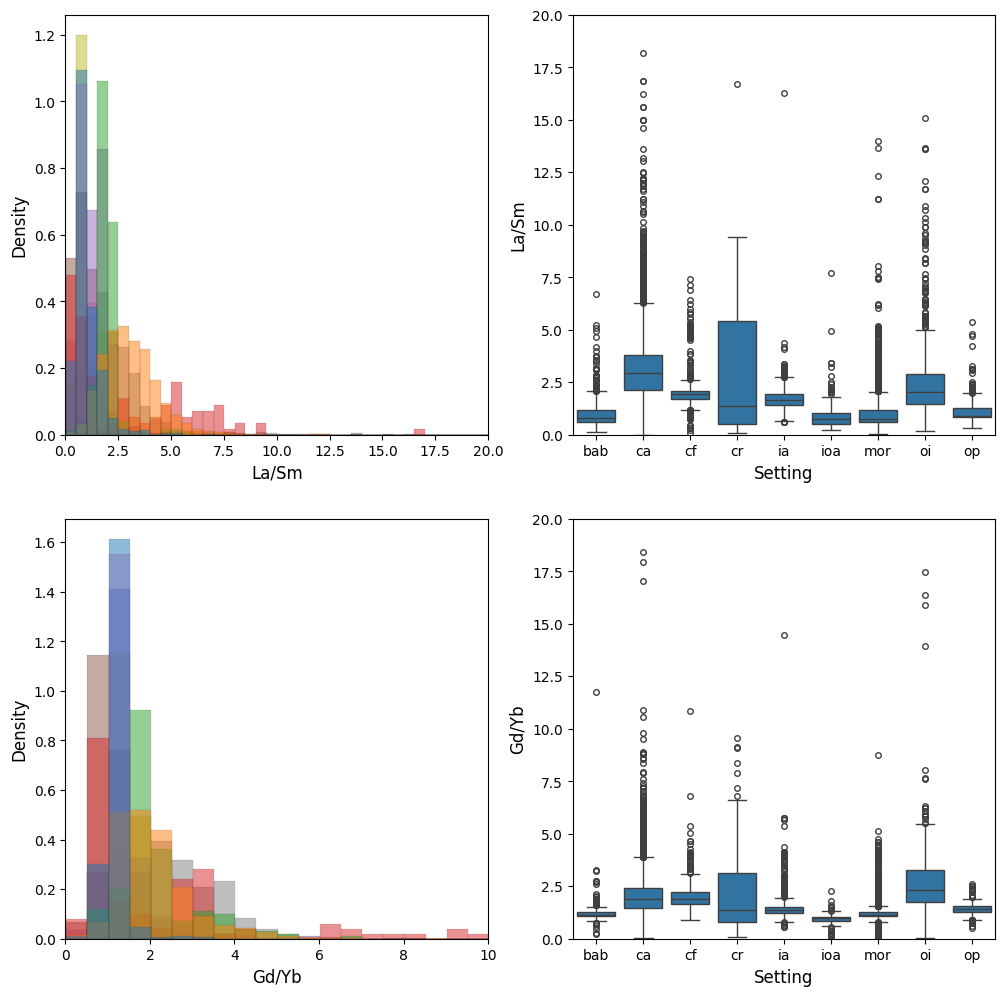

In [ ]:
# Now let's visualize the distributions of certain ratios by different tectonic setting

fig, axes = plt.subplots(2,2,figsize=(12,12)) # 2x2 grid of plots
ax1,ax2,ax3,ax4 = axes.ravel()

# Upper left
sns.histplot(
    data=REE.reset_index(), # Account for duplicate labels in index
    x="La/Sm",
    hue="Setting",
    binwidth=.5,
    stat="density", # Area under the graph = 1
    common_norm=False,
    legend=False,
    ax=ax1
)
ax1.set_xlim(0,20)

# Upper right
sns.boxplot(
    data=REE.reset_index(),
    y="La/Sm",
    x="Setting",
    ax=ax2
)
ax2.set_ylim(0,20)

# Lower left
sns.histplot(
    data=REE.reset_index(), # Account for duplicate labels in index
    x="Gd/Yb",
    hue="Setting",
    binwidth=.5,
    stat="density", # Area under the graph = 1
    common_norm=False,
    legend=False,
    ax=ax3
)
ax3.set_xlim(0,10)

# Lower right
sns.boxplot(
    data=REE.reset_index(),
    y="Gd/Yb",
    x="Setting",
    ax=ax4
)
ax4.set_ylim(0,20)

## Ternary plot

In [ ]:
from matplotlib.cm import get_cmap
import matplotlib.colors as mcolors

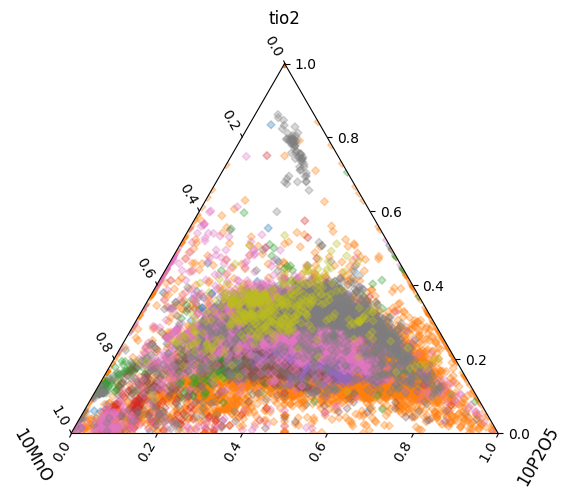

In [ ]:
df["10MnO"] = df.eval("mno * 10")
df["10P2O5"] = df.eval("p2o5 * 10")

# Using pyrolite
fig,ax = plt.subplots()


for s,c in zip(REE.Setting.unique(),mcolors.TABLEAU_COLORS.keys()):
    df.loc[df.level3==s,["tio2","10MnO","10P2O5"]].pyroplot.scatter(color=c,ax=ax,
                                                              alpha=0.3)
plt.show()

## Spidergrams

/usr/local/lib/python3.10/dist-packages/pyrolite/plot/spider.py:276: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(_ymin, _ymax)
/usr/local/lib/python3.10/dist-packages/pyrolite/plot/spider.py:276: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(_ymin, _ymax)


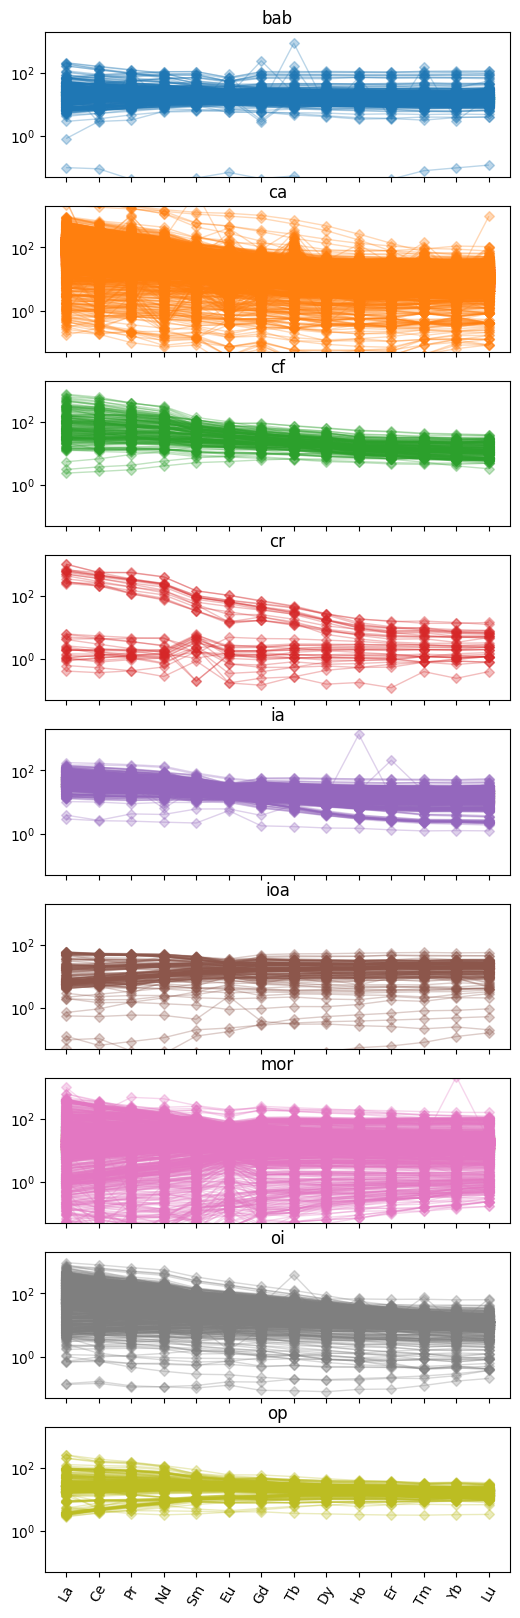

In [ ]:
REE = REE.replace(to_replace=0.,value=np.nan)
REE = REE.dropna()
# This bit was just to make sure we don't have nan or 0 values (would break the log-axis)


fig, axes = plt.subplots(len(REE.Setting.unique()),1,figsize=(6,20),sharex=True,sharey=True)

for s,c,ax in zip(REE.Setting.unique(),mcolors.TABLEAU_COLORS.keys(),axes.flatten()):
    REE.loc[REE.Setting==s].pyroplot.spider(color=c,ax=ax,alpha=0.3)
    ax.set_title(s)
    ax.set_ylim(0.05,2000)

Using pyrolite we can also colour by certain attributes. For example we can use a colormap for MgO%

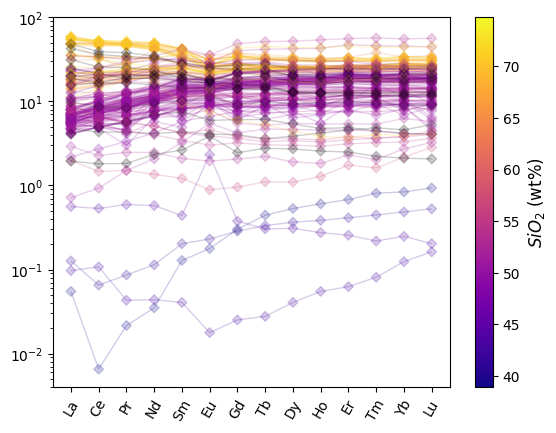

In [ ]:
from matplotlib import colors, cm
ax = REE.loc[REE.Setting=="ioa"].pyroplot.spider(
    cmap='plasma',
    alpha=0.2,
    color=df.loc[df.index.isin(REE.loc[REE.Setting=="ioa"].index)]["sio2"]
)

cmap = cm.plasma
norm = colors.Normalize(
    vmin=df.loc[df.index.isin(REE.loc[REE.Setting=="ioa"].index)]["sio2"].min(),
    vmax=df.loc[df.index.isin(REE.loc[REE.Setting=="ioa"].index)]["sio2"].max())

fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="$SiO_{2}$ (wt%)")





# Isotopes
In this subsection we will learn how to calculate initial ratios, epsilon values and model ages.

We'll start by loading the dataset from [Mamani et al. (2010)](https://pubs.geoscienceworld.org/gsa/gsabulletin/article/122/1-2/162/125475/Geochemical-variations-in-igneous-rocks-of-the) with rock compositions from the Central Andes

In [ ]:
# first we will load some data
df = pd.read_excel(r"https://raw.githubusercontent.com/pierosampaio/PythonWorkshop/main/Files/Woerner_CentralAndes.xlsx",sheet_name="Table DR2")
df = df.rename({'Geologycal_age':'Age'})
df.head()

As we are interested in calculating initial ratios we will only select the samples that have age **AND** Nd isotopic data

In [ ]:
df = df.loc[(df['Age  (Ma)'].notnull())&(df["143_144Nd"]).notnull()]

We don't have $^{147}Sm/^{144}Nd$ data. However, we can estimate that using the following equation from Faure (1986):

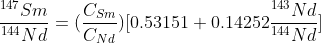

We can define a function that will be passed to every row with the `.apply()` method

In [ ]:
def estimate_147Sm(row):

  Sm = row["Sm_icpms"]
  Nd = row["Nd_icpms"]
  Nd143 = row["143_144Nd"]

  return (Sm/Nd)*(0.53151 + 0.14252*Nd143)

df["147Sm_144Nd"] = df.apply(estimate_147Sm, axis=1)

<ipython-input-28-dba58871f74f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["147Sm_144Nd"] = df.apply(estimate_147Sm, axis=1)


We can now use this new column as input for calculating the initial $^{143}Nd/^{144}Nd$ using the following equation:

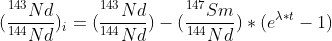

In [ ]:
def initial_Nd143(row):

    Nd143 = row["143_144Nd"]
    Sm147 = row["147Sm_144Nd"]
    lbd_Nd = 6.54e-12
    t = row["Age  (Ma)"]*1e6 # The ages were given as Ma

    Nd143_ini = Nd143 - Sm147*(np.exp(t*lbd_Nd)-1)

    return Nd143_ini

df["143Nd_144Nd_i"] = df.apply(initial_Nd143, axis=1)


<ipython-input-29-1c6419207bda>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["143Nd_144Nd_i"] = df.apply(initial_Nd143, axis=1)


With the initial Nd isotopic ratio we can calculate $ϵ_{Nd}$ and $T_{DM}$.

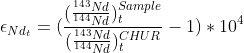

First let's define a helper function for back-calculating **CH**ondritic **U**niform **R**eservoir (CHUR) composition at the initial time for calculating $ϵ_{Nd}$:

In [ ]:
def Nd_CHUR(age):

    tt = age*1e6
    lbd_Nd = 6.54e-12 #Lugmair and Marti 1978
    mu_CHUR,a_CHUR = 0.1967, 0.512638 #Jacobsen and Wasserburg, 1980

    CHUR = a_CHUR - mu_CHUR*(np.exp(lbd_Nd*tt)-1)

    return np.round(CHUR,6)

def epsilon_Nd(row):

  t = row["Age  (Ma)"]
  lbd_Nd = 6.54e-12

  eps = ((row["143Nd_144Nd_i"]/Nd_CHUR(t)-1))*1e4
  return eps

df["eNd_i"] = df.apply(epsilon_Nd,axis=1)

<ipython-input-30-601c07d4a4df>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["eNd_i"] = df.apply(epsilon_Nd,axis=1)


<Axes: >

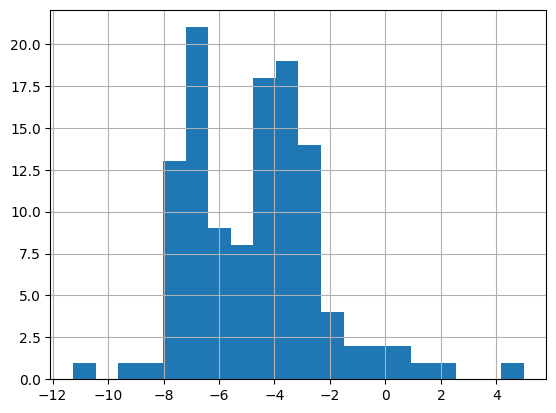

In [ ]:
df["eNd_i"].hist(bins=20)

For $T_{DM}$ calculation we can use the following equation (for single-stage Nd model age):

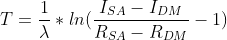

where I is the $^{143}Nd/^{144}Nd$ and R is the $^{147}Sm/^{144}Nd$


In [ ]:
def calculate_TDM(row):
  lbd_Nd = 6.54e-12
  R_DM,I_DM = 0.222, 0.513114 # Michard et al. 1985
  R_SA,I_SA = row["147Sm_144Nd"],row["143_144Nd"]

  T = (1/lbd_Nd)*np.log((I_SA - I_DM)/(R_SA - R_DM) + 1)

  return T/1e9

df["TDM (Ga)"] = df.apply(calculate_TDM,axis=1)

<ipython-input-33-accce3c3053f>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.Rock_type.unique(),rotation=45)


[Text(0, 0, 'andesite'),
 Text(1, 0, 'dacite'),
 Text(2, 0, 'basaltic andesite'),
 Text(3, 0, 'trachyandesite'),
 Text(4, 0, 'rhyolite'),
 Text(5, 0, 'basalt'),
 Text(6, 0, 'monzonite'),
 Text(7, 0, 'granodiorite'),
 Text(8, 0, 'diorite')]

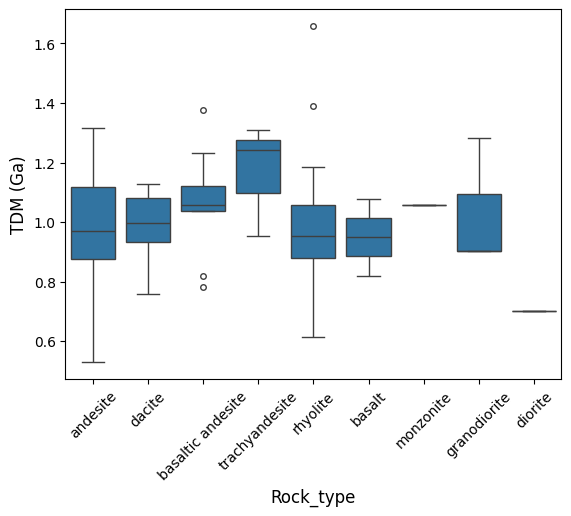

In [ ]:
fig, ax = plt.subplots()

sns.boxplot(
    data=df,
    y="TDM (Ga)",
    x="Rock_type",
    ax=ax
)

ax.set_xticklabels(df.Rock_type.unique(),rotation=45)

<Axes: xlabel='TDM (Ga)', ylabel='Latitude (Y)'>

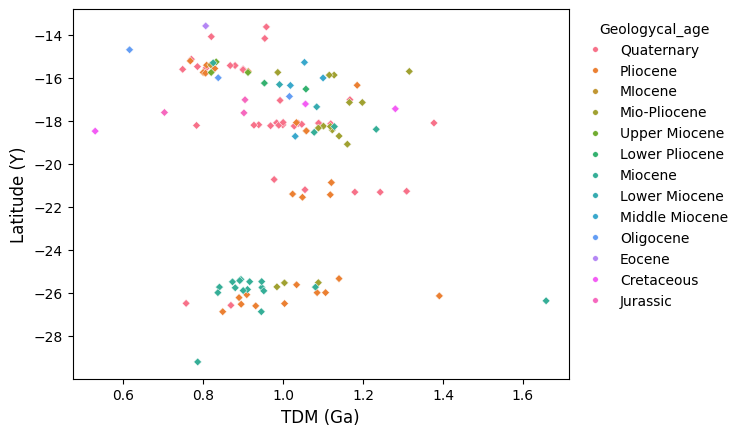

In [ ]:
fig, ax = plt.subplots()

sns.scatterplot(
    data=df,
    y="Latitude (Y)",
    x="TDM (Ga)",
    hue="Age",
    ax=ax
)